# 使用PCR方法分析Hitters数据，去预测Salary。

The data set contains some information of American Basketball League players. There is a salary variable depending on the variables such as error, assist, experience, shooting belonging to the players. 

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

读取数据，去掉缺失值值

In [5]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()###对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置。
df = df.dropna()
df.head()###第一行当作表头。

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


df.info():主要介绍数据集各列的数据类型，是否为空值，内存占用情况。

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

df.describe(): 主要介绍数据集各列的数据统计情况（最大值、最小值、标准偏差、分位数等等）。
描述性统计，后面的（.T）是转置。

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


 pd.get_dummies(),将类别转化为编码，这里把'League','Division','NewLeague'三个二元类别变量转为三个0，1虚拟变量。

In [42]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


y = df["Salary"] 是要预测的变量。

In [43]:
y = df["Salary"]

把要预测的df["Salary"]删掉，把"League","Division","NewLeague"换成0，1值。

In [12]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [13]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [44]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)###pd.concat()默认上下堆叠，参数axis = 1设为左右拼接。
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


train_test_split将原始数据按照比例分割为“测试集”和“训练集”。
test_size=0.25是测试集占总样本的百分比。
random_state=42是随机数种子。

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("X_train", X_train.shape)

print("y_train", y_train.shape)

print("X_test", X_test.shape)

print("y_test", y_test.shape)

training = df.copy()###副本。

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


直接调包

sklearn.decomposition.PCA 中的pca.fit_transform()用来训练PCA模型，自动降维，同时返回降维后的数据。

sklearn.preprocessing.scale，数据预处理，scale()标准化，均值变为0，方差变为1。


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

旋转坐标轴

In [49]:
X_reduced_train = pca.fit_transform(scale(X_train))
print("X_reduced_train.shape",X_reduced_train.shape)

X_reduced_train.shape (197, 19)


In [59]:
X_reduced_train[0:1,:] ###旋转之后第一个样本点的坐标。

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [52]:
X_reduced_train[1:2,:]###旋转之后第二个样本点的坐标。

array([[ 1.57074119, -0.6264137 ,  3.18877005,  1.1621204 , -1.53912925,
        -0.6181545 ,  1.39000146,  0.77138581,  0.24259021, -0.57255347,
        -0.09401456, -0.05554259,  0.41044145,  0.01665555,  0.20643749,
         0.01244189,  0.02724013, -0.16810894,  0.120561  ]])

In [53]:
X_reduced_train[2:3,:]###旋转之后第三个样本点的坐标。

array([[ 1.50009234, -1.7214891 , -1.68448622, -0.09963579,  1.13499306,
        -0.35344241,  0.04879466, -0.14854805, -0.11534444,  0.38650444,
         0.11069469, -0.24031963,  0.25083415,  0.40352333, -0.48204267,
        -0.03519008,  0.05533988, -0.09085195, -0.01154648]])

In [56]:
X_reduced_train[3:4,:]###旋转之后第四个样本点的坐标。

array([[-2.49461763,  1.29479668, -0.8730115 ,  1.38186166, -1.25393624,
         0.33575583, -0.25331435,  0.00323531, -0.21860494, -0.2178487 ,
        -0.11178346,  0.10490786, -0.57627353, -0.09619614,  0.32670594,
        -0.26507509,  0.05318352,  0.03860084, -0.02612041]])

In [60]:
X_reduced_train[196:197,:]###旋转之后第197个样本点的坐标。

array([[-2.50242254, -0.84352948,  0.58910991,  2.8194333 ,  0.55373595,
         0.55583966,  0.58573619,  0.16924393,  0.58150264,  0.4618366 ,
        -0.003477  ,  0.05727404, -0.29219167,  0.11605339, -0.1965347 ,
        -0.20542108,  0.04505877,  0.10360705, -0.0221173 ]])

In [74]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:8]
###pca.explained_variance_ratio_查看降维后每个新特征向量所占的信息量占原始数据总信息量的比例。
###np.cumsum()累计求和。

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86])

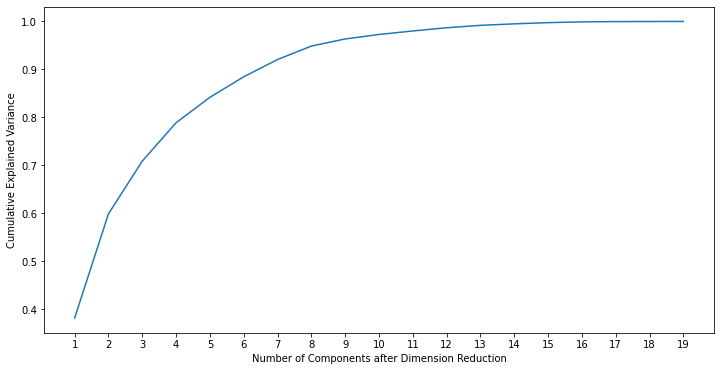

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],np.cumsum(pca.explained_variance_ratio_))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])        
plt.xlabel("Number of Components after Dimension Reduction")
plt.ylabel("Cumulative Explained Variance")
plt.show()

X_reduced_train和y_train做线性拟合。

In [81]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
pcr_model.intercept_ ###常数项β0

543.4834416243655

In [82]:
pcr_model.coef_###回归系数β1，β2，...,β19。

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

未降维之前学习器在训练集中的性能。

评价标准：MSE 、 R2。

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pcr_model.predict(X_reduced_train)###用拟合好的模型预测y。
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [84]:
np.sqrt(mean_squared_error(y_train, y_pred))###训练集中预测出来的y和真实的y之间的RMSE。

289.32928255649756

In [26]:
df["Salary"].mean()

535.9258821292775

In [85]:
r2_score(y_train, y_pred)###训练集中预测出来的y和真实的y之间的r2得分。
###r2得分比较低，说明模型效果不是很好。

0.577007525041018

未降维之前学习器在测试集中的性能。

评价标准：MSE 

In [86]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test,y_pred))###测试集中的RMSE比训练集中的还要高。

405.1575364149967

模型校正（model tuning）。

降维。

十折交叉验证。

K次交叉验证，将训练集分割成K个子样本，一个单独的子样本被保留作为验证模型的数据，其他K-1个样本用来训练。交叉验证重复K次，每个子样本验证一次，平均K次的结果或者使用其它结合方式，最终得到一个单一估测。这个方法的优势在于，同时重复运用随机产生的子样本进行训练和验证，每次的结果验证一次，10次交叉验证是最常用的。

In [29]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))###降至10维的效果。

390.7914255682225


In [32]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)###十折交叉验证。
lm = LinearRegression()

In [33]:
RMSE = []

In [87]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                      X_reduced_train[:,:i],
                                                      y_train.ravel(),
                                                      cv = cv_10,
                                                      scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
# 参数设置中 scoring = 'neg_mean_squared_error' 可以看出，
# 前边有个 neg ，neg 就是negative 负数的意思，sklearn 在计算模型评估指标的时候，
# 会考虑指标本身的性质，既然是误差那肯定是一种损失 Loss。在 sklearn 中，所有的损失都用负数表示，
# 所以无论是均方误差还是平方误差，都会被计算成负数。而我们真正需要的值需要去掉负号。

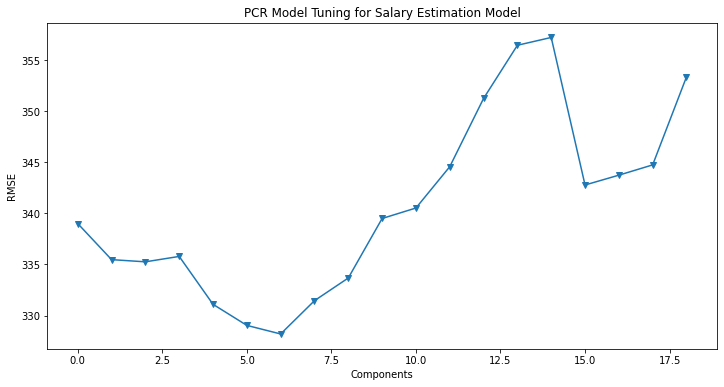

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(RMSE,'-v')
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Salary Estimation Model');

#Components 为 6 的时候RMSE最小。

In [88]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train, y_pred)))

#提取六个主成分后进行回归拟合后的学习器，在训练集上的RMSE有所下降，性能有所提升。

308.8265983094501


In [89]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#提取六个主成分后进行回归拟合后的学习器，在测试集上的RMSE有所下降，性能有所提升。

393.1198700096224
